# THE SPARKS FOUNDATION

# DATA SCIENCE & BUSINESS ANALYTICS

# Author:Eroji Aruna

# Task 2:Prediction using Unsupervised ML

# 

# **K- Means Clustering**

**Importing libraries**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# **Importing the Dataset**

In [5]:
ir = pd.read_csv("D:\TSF\Iris.csv")
print(ir.shape)

(150, 6)


**data_points and features**

In [6]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
ir.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**Column names**

In [9]:
print(ir.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


**Data points for each class &
 Flowers for each species**

In [10]:
ir["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Iris is a balanced dataset as the number of data points for every class is 50.

# Visualization

# **Pair-plot**

pair-plot:Pair-wise scatter plot

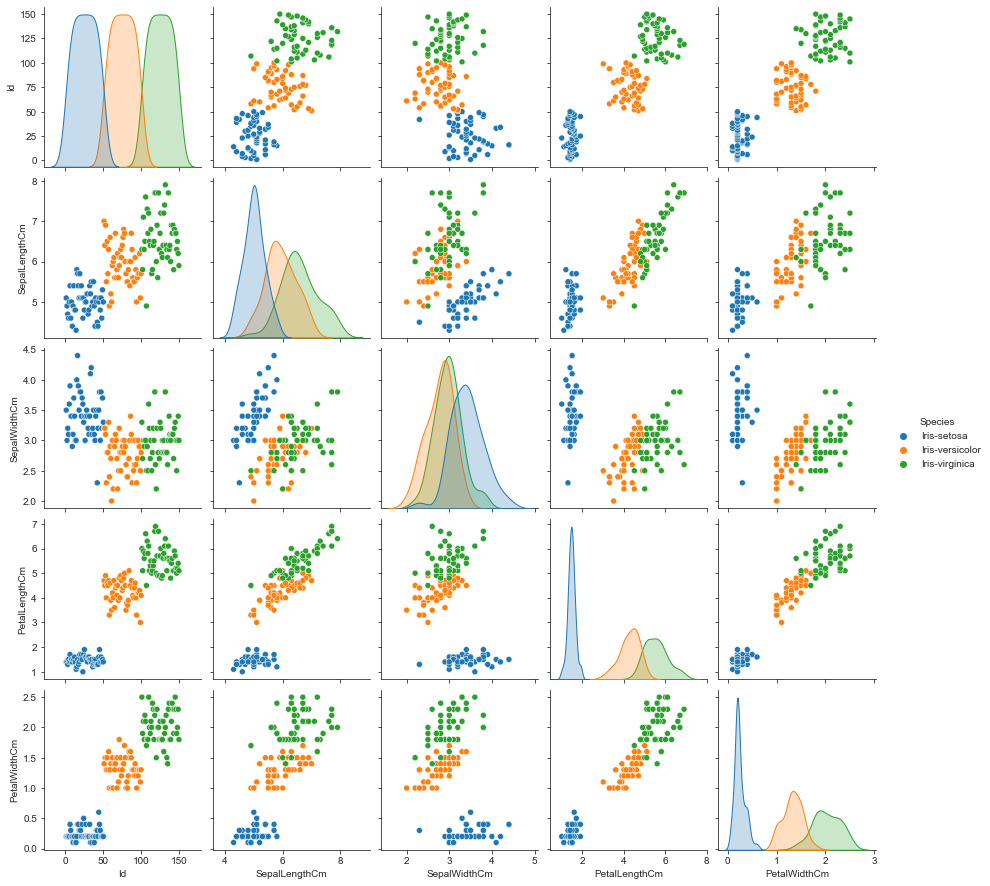

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

plt.close()
sns.set_style("ticks")
sns.pairplot(ir, hue="Species", size=2.5)
plt.show()

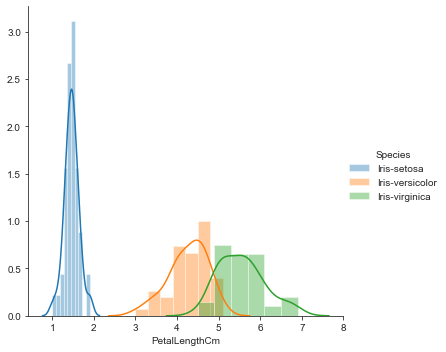

In [12]:
sns.FacetGrid(ir, hue="Species", size=5) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend()
plt.show()

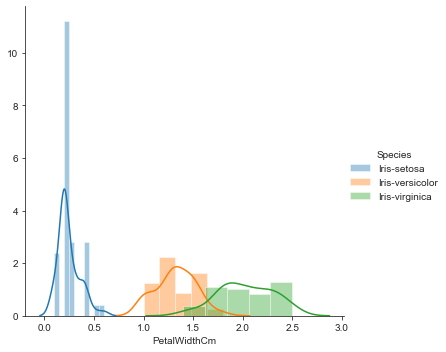

In [13]:
sns.FacetGrid(ir, hue="Species", size=5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend()
plt.show()

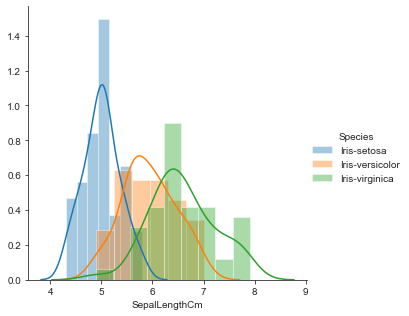

In [17]:
sns.FacetGrid(ir, hue="Species", size=4.5) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend()
plt.show()

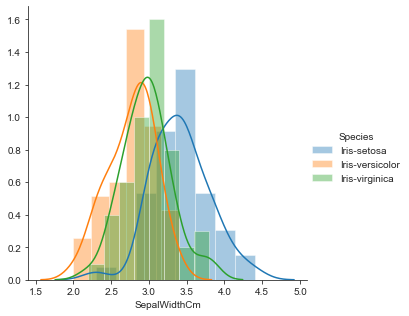

In [20]:
sns.FacetGrid(ir, hue="Species", size=4.5) \
   .map(sns.distplot, "SepalWidthCm") \
   .add_legend()
plt.show()

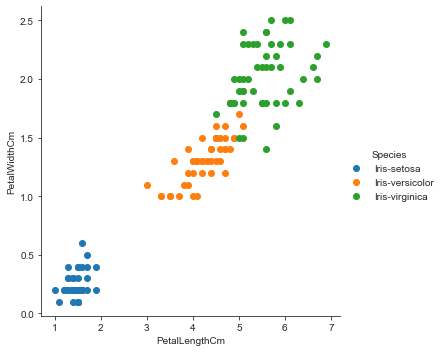

In [49]:
sns.FacetGrid(ir, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()
plt.show()

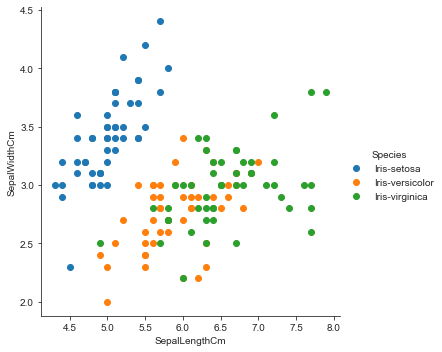

In [50]:
sns.FacetGrid(ir, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

# **Violin Plots**

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

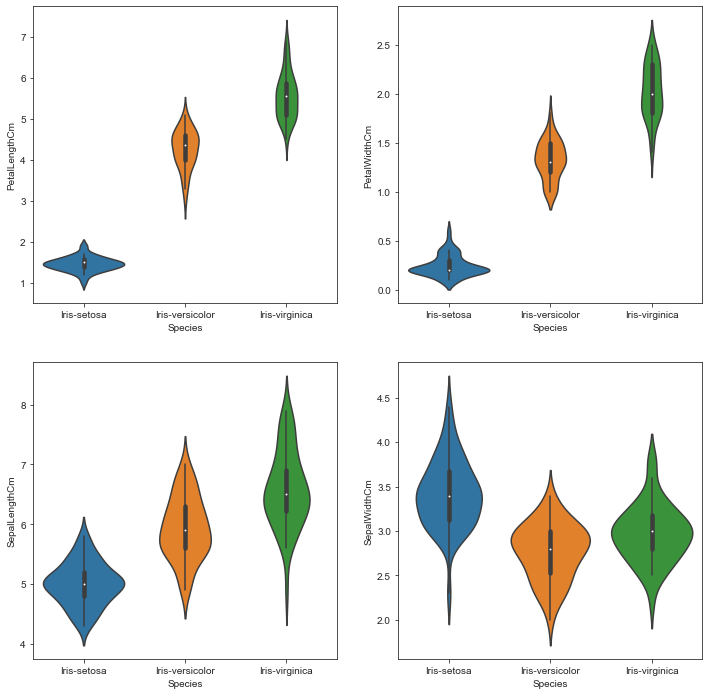

In [21]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.violinplot(x = "Species", y = "PetalLengthCm", data = ir)
plt.subplot(2,2,2)
sns.violinplot(x = "Species", y = "PetalWidthCm", data = ir)
plt.subplot(2,2,3)
sns.violinplot(x = "Species", y = "SepalLengthCm", data = ir)
plt.subplot(2,2,4)
sns.violinplot(x = "Species", y = "SepalWidthCm", data = ir)

# KMeams_Clustering

**Finding the optimum number of clusters for KMeans classification**

**Plotting the results on a line graph & allowing us to observe The elbow**

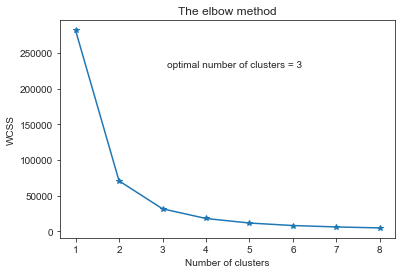

In [49]:
x = ir.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = "k-means++",
                   max_iter = 300, n_init = 8, random_state = 500)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,9), wcss, marker = "*")
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.text(3.1,230000,"optimal number of clusters = 3")
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

**Applying kmeans to the dataset / Creating the kmeans classifier**

In [46]:
kmeans = KMeans(n_clusters = 3, init = "k-means++",
               max_iter = 300, n_init = 8, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

 **Visualising the clusters - On the first two columns**

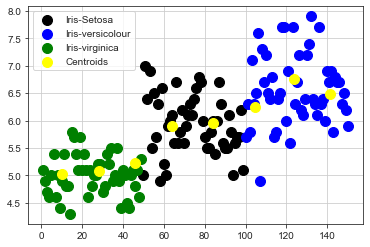

In [53]:
plt.scatter(z[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s = 100, c = "black", label = "Iris-Setosa")
plt.scatter(z[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s = 100, c = "blue", label = "Iris-versicolour")
plt.scatter(z[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
           s = 100, c = "green", label = "Iris-virginica")
plt.grid(True)

##Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
